# Table of Contents
 <p><div class="lev1 toc-item"><a href="#plot-NMI-as-beta-varies" data-toc-modified-id="plot-NMI-as-beta-varies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>plot NMI as beta varies</a></div><div class="lev1 toc-item"><a href="#Testing-on-football-network" data-toc-modified-id="Testing-on-football-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Testing on football network</a></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
# reload(modbp)

In [7]:
n=200
q=3
nblocks=q
pin=(5.0*q)/n
pout=(.50*q)/n
t=time()
prob_mat=np.identity(nblocks)*pin + (np.ones((nblocks,nblocks))-np.identity(nblocks))*pout
print prob_mat
RSBM = modbp.RandomSBMGraph(n=n,comm_prob_mat=prob_mat)
color_dict=dict(zip(range(10),sbn.color_palette('Set1',10)))
RSBM.graph.vs['color']=map(lambda x : color_dict[x],RSBM.graph.vs['block'])
m= RSBM.m
elist=RSBM.get_edgelist()
elist.sort()
pv=modbp.bp.PairVector(elist)

bpgc=modbp.BP_Modularity(edgelist=pv, _n=n, q=q, beta=1, transform=False)
bpgc.run()
marg=np.array(bpgc.return_marginals())


print("time to construct {:.4f}".format(time()-t))

[[0.075  0.0075 0.0075]
 [0.0075 0.075  0.0075]
 [0.0075 0.0075 0.075 ]]
[66, 66, 68]
time to construct 0.0192


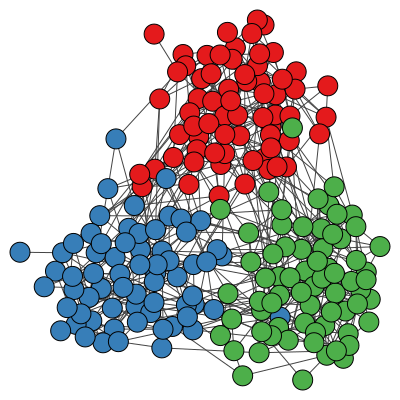

In [8]:
#create forceatlas layout
adj=np.array(RSBM.get_adjacency().data)
pos=fa2.forceatlas2(adj,scalingRatio=10,gravity=1,strongGravityMode=False,edgeWeightInfluence=0)
layout=ig.Layout(pos)
ig.plot(RSBM.graph,layout=layout,inline=True,bbox=[400,400])

# plot NMI as beta varies

In [48]:
betas=np.linspace(.1,2,50)
fin_nmi=[]
for beta in betas:
    #This is where we would want to be able to recall the BP algorithm
    #without having to reconstruct the graph.  Presumably we could use 
    #the state of previous BP as warm initialization
    bpgc=modbp.BP_Modularity(edgelist=pv, _n=n, q=q, beta=beta, transform=False)
    bpgc.run()
    marg=np.array(bpgc.return_marginals())
    color_dict={0:"red",1:"blue",2:'green'}
    RSBM.graph.vs['color']=map(lambda x : color_dict[np.argmax(x)],marg)
    cnmi=RSBM.get_AMI_with_blocks(RSBM.graph.vs['color'])
#     print("NMI at beta={:.2f}: {:.3f}".format(beta,cnmi))
    fin_nmi.append(cnmi)

fin_nmi=np.array(fin_nmi)

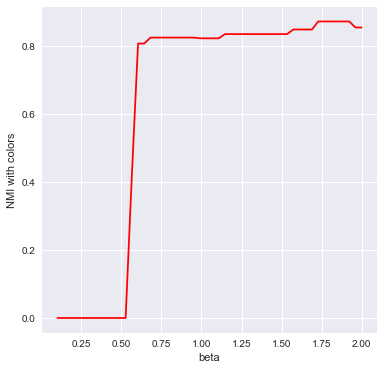

In [49]:
plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
a.plot(betas,fin_nmi,color='r')
a.set_xlabel('beta')
a.set_ylabel('NMI with colors')
plt.show()

modularity: 0.000


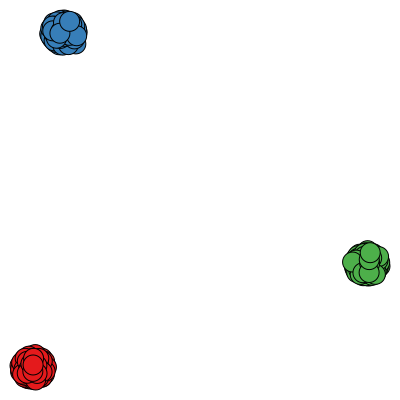

In [17]:
n=200
q=3
nblocks=q
pin=(5.0*q)/n
pin=1
pout=0
# pout=(.50*q)/n
prob_mat = np.identity(q) * pin + (np.ones((q, q)) - np.identity(q)) * pout
randSBM=modbp.RandomSBMGraph(n,prob_mat)
mbpinterface=modbp.ModularityBP(randSBM.graph)
beta=1
mbpinterface.run_modbp(beta=beta,q=q)
# mbpinterface.run_modbp(beta=1,q=2)

cols=sbn.color_palette('Set1',8)
mbpinterface.graph.vs['color']=map(lambda x : cols[x],mbpinterface.partitions[q][beta])

#create forceatlas layout
adj=np.array(mbpinterface.graph.get_adjacency().data)
pos=fa2.forceatlas2(adj,scalingRatio=10,gravity=1,strongGravityMode=False,edgeWeightInfluence=0)
layout=ig.Layout(pos)
print "modularity: {:.3f}".format(mbpinterface.retrival_modularities[q][beta])
ig.plot(mbpinterface.graph,layout=layout,inline=True,bbox=[400,400])


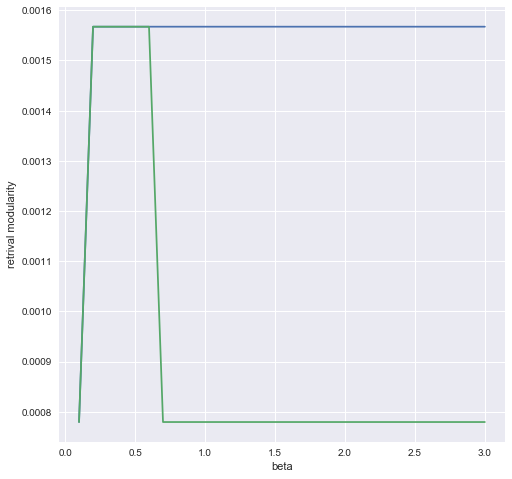

In [2]:
n=200
q=3
nblocks=q
pin=(5.0*q)/n
pout=(.50*q)/n
prob_mat = np.identity(q) * pin + (np.ones((q, q)) - np.identity(q)) * pout
randSBM=modbp.RandomSBMGraph(n,prob_mat)
mbpinterface=modbp.ModularityBP(randSBM.graph)


betas=np.linspace(.1,3,30)
qs=np.array([2,3])#,4,5])

for q in qs:
    for beta in betas:
        mbpinterface.run_modbp(beta=beta,q=q)

plt.close()
f,a=plt.subplots(1,1,figsize=(8,8))

for q in qs:
    b,m=zip(*sorted(mbpinterface.retrival_modularities[q].items(),key=lambda x: x[0]))
    a.plot(b,m)
a.set_xlabel("beta")
a.set_ylabel("retrival modularity")
plt.show()


In [8]:
zip(*mbpinterface.retrival_modularities[q].items())

[(2.0,
  0.16551724137931034,
  1.1482758620689655,
  1.8689655172413793,
  0.49310344827586206,
  1.0172413793103448,
  1.6068965517241378,
  0.4275862068965517,
  1.475862068965517,
  0.9517241379310344,
  1.3448275862068966,
  0.3620689655172413,
  0.886206896551724,
  1.2137931034482758,
  1.9344827586206894,
  0.8206896551724137,
  1.0827586206896551,
  1.803448275862069,
  0.296551724137931,
  0.23103448275862068,
  0.7551724137931034,
  1.6724137931034482,
  0.689655172413793,
  0.1,
  1.5413793103448274,
  0.6241379310344827,
  1.7379310344827585,
  1.410344827586207,
  0.5586206896551723,
  1.2793103448275862),
 (0.9809523809523809,
  1.9714285714285715,
  1.9714285714285715,
  0.9809523809523809,
  1.9714285714285715,
  1.9714285714285715,
  1.9714285714285715,
  0.9809523809523809,
  0.9809523809523809,
  1.9714285714285715,
  0.9809523809523809,
  1.9714285714285715,
  0.9809523809523809,
  1.9714285714285715,
  1.9714285714285715,
  0.9809523809523809,
  1.9714285714285715

# Testing on football network
We scan to look at how many communities are suggested

In [3]:
fbnet=ig.load("./football.net.graphml.gz")
n=fbnet.vcount()
elist=fbnet.get_edgelist()
elist.sort()
pv=modbp.bp.PairVector(elist)
bpgc=modbp.BP_Modularity(edgelist=pv, n=n, q=q, beta=1,resgamma=1, transform=False)
bpgc.run()
marg=np.array(bpgc.return_marginals())


print("time to construct {:.4f}".format(time()-t))

NameError: name 'q' is not defined